In [12]:
#Librerias Necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression

In [ ]:
df_1 = pd.read_excel("ADINELSA_ANCASH.xlsx",sheet_name="HUARAZ")
df_1


,PERIODO,CONSUMO,PROMEDIO,CANTIDAD
0,202303,0,0.0,1
1,202304,1,0.5,2
2,202305,55,27.5,2
3,202306,9,4.5,2
4,202307,9,4.5,2
5,202308,1,0.5,2
6,202309,1,0.5,2
7,202310,4,2.0,2
8,202311,4,2.0,2
9,202312,7,3.5,2


In [14]:
# Convertir PERIODO a un formato datetime (año y mes)
df_1['PERIODO'] = pd.to_datetime(df_1['PERIODO'].astype(str), format='%Y%m')
df_1.set_index('PERIODO', inplace=True)  # Usar PERIODO como índice
print(df_1)

            CONSUMO  PROMEDIO  CANTIDAD
PERIODO                                
2023-03-01        0       0.0         1
2023-04-01        1       0.5         2
2023-05-01       55      27.5         2
2023-06-01        9       4.5         2
2023-07-01        9       4.5         2
2023-08-01        1       0.5         2
2023-09-01        1       0.5         2
2023-10-01        4       2.0         2
2023-11-01        4       2.0         2
2023-12-01        7       3.5         2
2024-01-01        8       4.0         2
2024-02-01       63      31.5         2
2024-03-01       65      32.5         2
2024-04-01       34      17.0         2
2024-05-01       10       5.0         2
2024-06-01        3       1.5         2
2024-07-01        6       3.0         2
2024-08-01       31      15.5         2
2024-09-01       25      12.5         2


In [15]:
# Media móvil no centrada

media_nocentrada = df_1['CONSUMO'].rolling(window=3, center=False).mean()
print("Media no centrada:\n", media_nocentrada)

Media no centrada:
 PERIODO
2023-03-01          NaN
2023-04-01          NaN
2023-05-01    18.666667
2023-06-01    21.666667
2023-07-01    24.333333
2023-08-01     6.333333
2023-09-01     3.666667
2023-10-01     2.000000
2023-11-01     3.000000
2023-12-01     5.000000
2024-01-01     6.333333
2024-02-01    26.000000
2024-03-01    45.333333
2024-04-01    54.000000
2024-05-01    36.333333
2024-06-01    15.666667
2024-07-01     6.333333
2024-08-01    13.333333
2024-09-01    20.666667
Name: CONSUMO, dtype: float64


In [16]:
# Media móvil centrada
media_centrada = df_1['CONSUMO'].rolling(window=3, center=True).mean()

print("Media centrada:\n", media_centrada)



Media centrada:
 PERIODO
2023-03-01          NaN
2023-04-01    18.666667
2023-05-01    21.666667
2023-06-01    24.333333
2023-07-01     6.333333
2023-08-01     3.666667
2023-09-01     2.000000
2023-10-01     3.000000
2023-11-01     5.000000
2023-12-01     6.333333
2024-01-01    26.000000
2024-02-01    45.333333
2024-03-01    54.000000
2024-04-01    36.333333
2024-05-01    15.666667
2024-06-01     6.333333
2024-07-01    13.333333
2024-08-01    20.666667
2024-09-01          NaN
Name: CONSUMO, dtype: float64


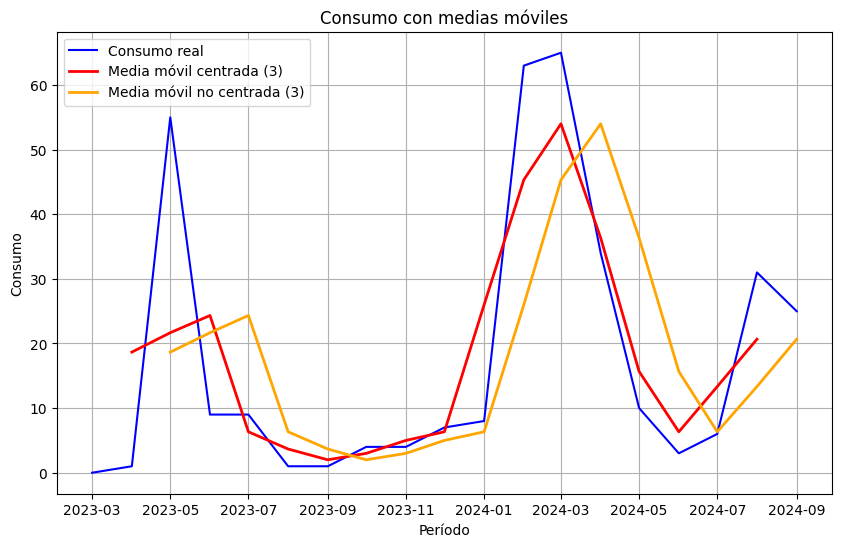

In [17]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='blue')
plt.plot(media_centrada, label='Media móvil centrada (3)', color='red', linewidth=2)
plt.plot(media_nocentrada, label='Media móvil no centrada (3)', color='orange', linewidth=2)

plt.title("Consumo con medias móviles")
plt.xlabel("Período")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Valores suavizados:
 PERIODO
2023-03-01     0.000000
2023-04-01     0.000000
2023-05-01     0.750000
2023-06-01    41.437500
2023-07-01    17.109375
2023-08-01    11.027344
2023-09-01     3.506836
2023-10-01     1.626709
2023-11-01     3.406677
2023-12-01     3.851669
2024-01-01     6.212917
2024-02-01     7.553229
2024-03-01    49.138307
2024-04-01    61.034577
2024-05-01    40.758644
2024-06-01    17.689661
2024-07-01     6.672415
2024-08-01     6.168104
2024-09-01    24.792026
dtype: float64
Pronósticos para los próximos períodos:
 2024-10-01    24.948006
2024-11-01    24.948006
2024-12-01    24.948006
Freq: MS, dtype: float64


f:\TAN-S15-ST\EnvTanTsS15\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


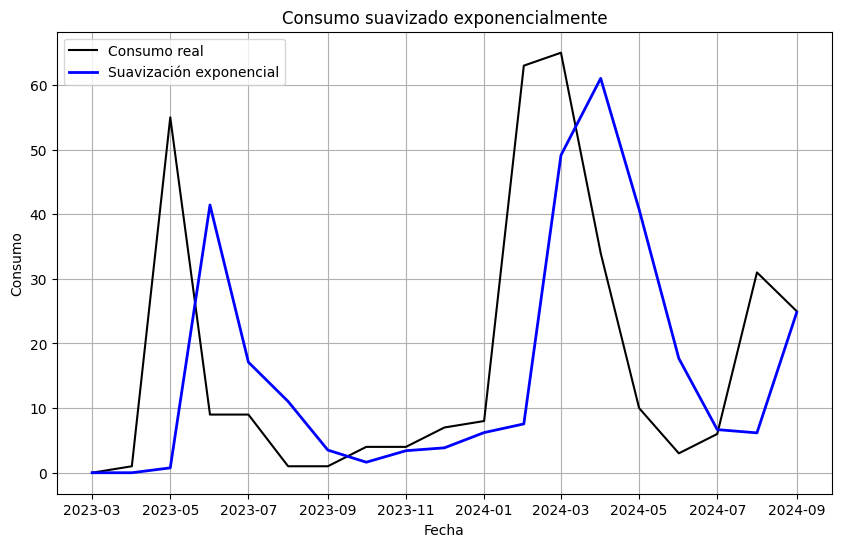

In [18]:
# Suavización exponencial
suavizador = SimpleExpSmoothing(df_1['CONSUMO']).fit(smoothing_level=0.75, optimized=False)
suavi_exp = suavizador.fittedvalues
forecast = suavizador.forecast(3)  # Pronosticar 3 meses futuros

# Mostrar resultados
print("Valores suavizados:\n", suavi_exp)
print("Pronósticos para los próximos períodos:\n", forecast)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='black')
plt.plot(suavi_exp, label='Suavización exponencial', color='blue', linewidth=2)
plt.title("Consumo suavizado exponencialmente")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Intercepto: 8.263157894736844
Pendiente: 0.9421052631578947
Predicciones para los próximos períodos: [27.10526316 28.04736842 28.98947368]


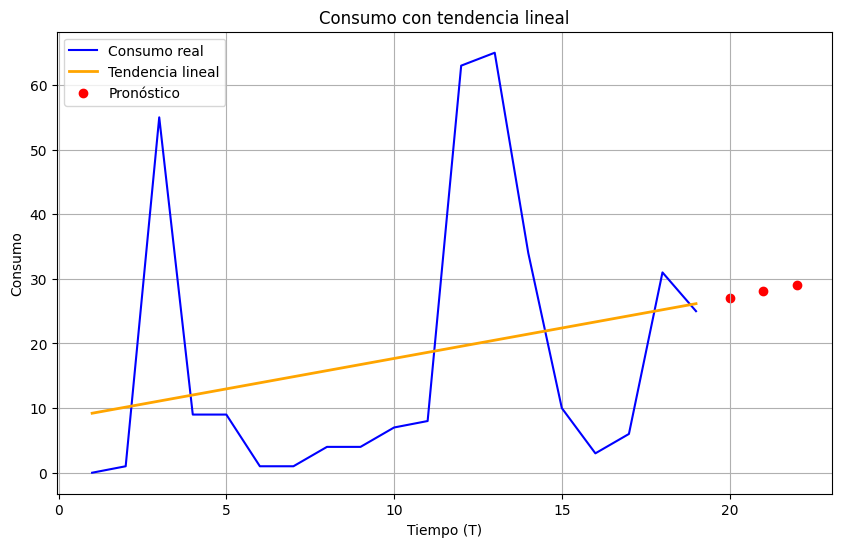

In [19]:
# Variable de tiempo basada en índices
df_1['T'] = range(1, len(df_1) + 1)

# Regresión lineal

X = df_1[['T']]
y = df_1['CONSUMO']
modelo = LinearRegression().fit(X, y)

# Predicciones futuras
nuevos_t = pd.DataFrame({'T': [len(df_1) + 1, len(df_1) + 2, len(df_1) + 3]})
predicciones = modelo.predict(nuevos_t)

# Mostrar resultados
print("Intercepto:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])
print("Predicciones para los próximos períodos:", predicciones)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['T'], y, label='Consumo real', color='blue')
plt.plot(df_1['T'], modelo.predict(X), label='Tendencia lineal', color='orange', linewidth=2)
plt.scatter(nuevos_t, predicciones, label='Pronóstico', color='red')
plt.title("Consumo con tendencia lineal")
plt.xlabel("Tiempo (T)")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()